In [1]:
# 1. Выбрать задачу (классификация или регрессия), датасет (пересечений не должно быть - у каждого студента свой датасет) и метрику качества

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [135]:
data = pd.read_csv("train.csv")

Датасет взят с сайта Kaggle.com и содержит опрос удовлетворенности пассажиров авиакомпании. https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction

In [136]:
data.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Датасет больше всего подходит для задачи классификации, так как набор лэйблов содержит только 2 категории - удовлетворен или нейтрален/неудовлетворен

In [137]:
data['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

Классы +- сбалансированы, значит можем использовать такую метрику как accuracy - базовую метрику для двоичной классификации.

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

#### 2. Сделать препроцессинг, фичеинжинириг и т.д. \\ разрешается использование любых пакетов
избавимся от пропусков данных, заполняя медианными значениями

In [139]:
df = data.copy()

In [140]:
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [141]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(axis=0), inplace = True)

In [142]:
df.isna().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [143]:
df.drop(['Unnamed: 0','id'],axis=1, inplace=True)

In [144]:
num_cols = df.select_dtypes(include = np.number).columns.to_list()
print('numeric cols: ', num_cols)
cat_cols = df.select_dtypes('object').columns.to_list()
print('categorical cols: ', cat_cols)

numeric cols:  ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
categorical cols:  ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [145]:
scaler = StandardScaler().fit(df[num_cols])
df[num_cols]=scaler.transform(df[num_cols])

In [146]:
df = pd.concat([df[num_cols],pd.get_dummies(df['Gender']),
                     pd.get_dummies(df['Customer Type']), 
                     pd.get_dummies(df['Type of Travel']),
                     pd.get_dummies(df['Class']),
                     df['satisfaction']], axis=1)

In [147]:
df['satisfaction'].replace(to_replace= 'satisfied', value = 1, inplace = True)
df['satisfaction'].replace(to_replace= 'neutral or dissatisfied', value = 0, inplace = True)

Мы определили категоральные признаки и с помощью pandas закодировали их, чтобы label 'satisfaction' в результате кодирования не раздваивался, просто заменяем категории на 0 и 1 в пределах одного столбца.

In [148]:
# 2*. Посчитать различные статистики, визуализировать данные и сделать первичные выводы \\ разрешается использование любых пакетов

In [150]:
data.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


<AxesSubplot:>

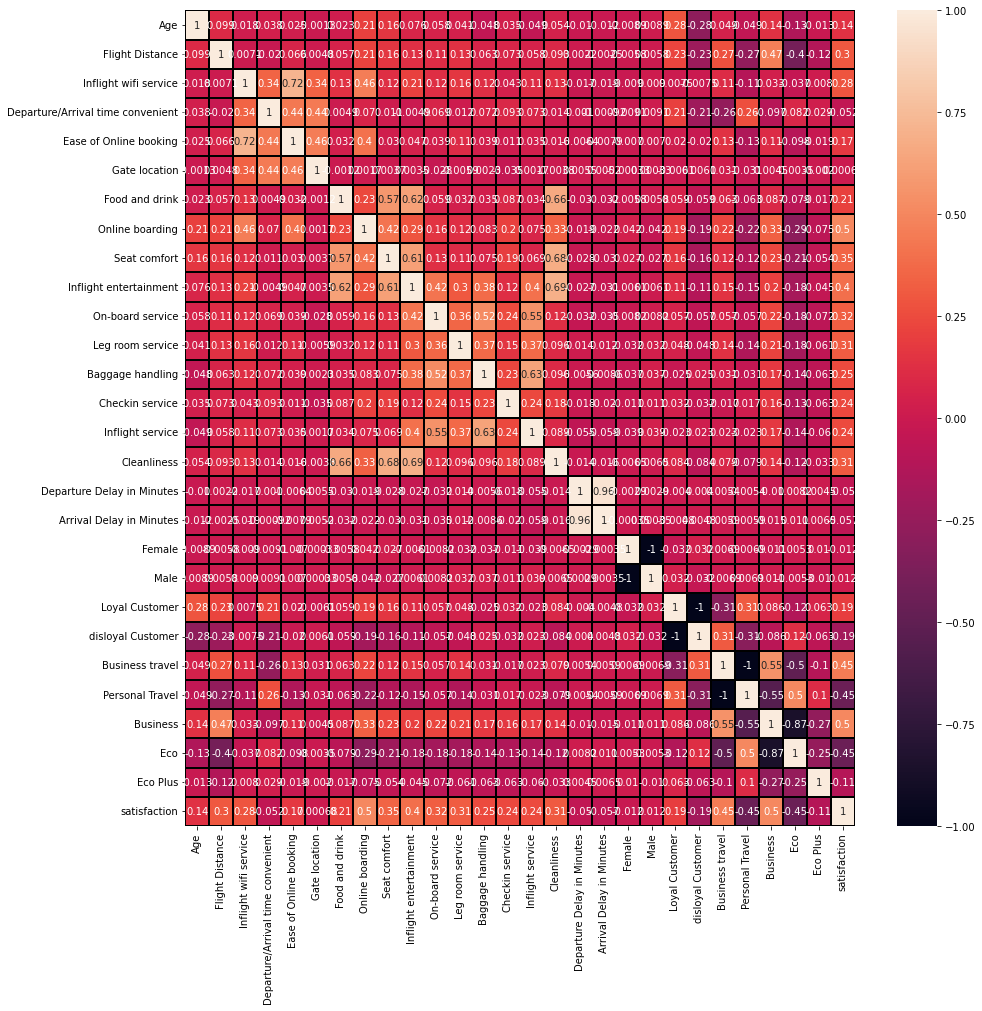

In [155]:
corr = df.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr, annot = True, linewidth = 1.5, linecolor = 'black', fmt='.2g')

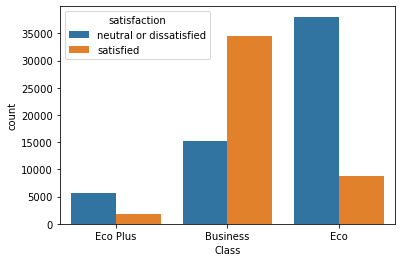

In [37]:
sns.countplot(x = 'Class', hue = 'satisfaction', data = data)
plt.show()

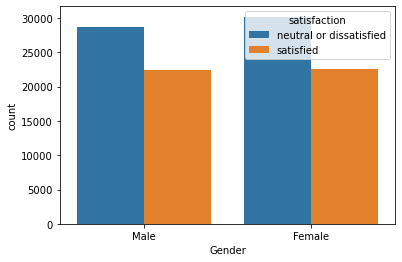

In [38]:
sns.countplot(x = 'Gender', hue = 'satisfaction', data = data)
plt.show()

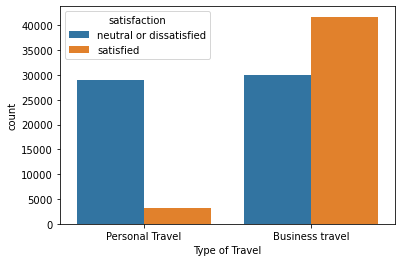

In [40]:
sns.countplot(x = 'Type of Travel', hue = 'satisfaction', data = data)
plt.show()

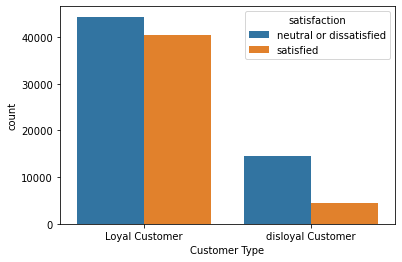

In [39]:
sns.countplot(x = 'Customer Type', hue = 'satisfaction', data = data)
plt.show()

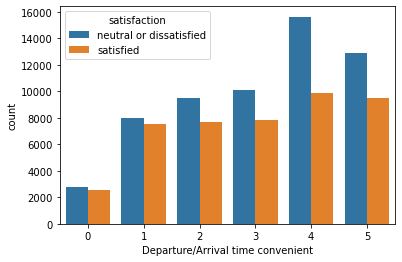

In [41]:
sns.countplot(x = 'Departure/Arrival time convenient', hue = 'satisfaction', data = data)
plt.show()

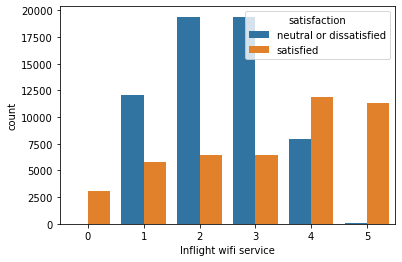

In [42]:
sns.countplot(x = 'Inflight wifi service', hue = 'satisfaction', data = data)
plt.show()

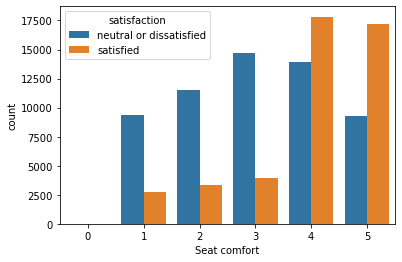

In [43]:
sns.countplot(x = 'Seat comfort', hue = 'satisfaction', data = data)
plt.show()

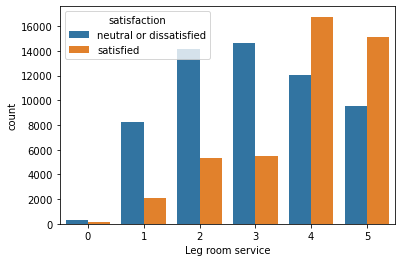

In [44]:
sns.countplot(x = 'Leg room service', hue = 'satisfaction', data = data)
plt.show()


Метрика accuracy показывает сумму истинных положительных и отрицательных значений, деленных на общее количество образцов, так как нам важны правильные ответы из всех классов одинаково, я решила взять именно эту метрику

In [83]:
def Accuracy(y, y_pred):
    TP = (y * y_pred).sum()
    TN = np.logical_not(y | y_pred).sum()
    return (TP + TN) / len(y)

In [ ]:
# 4. Реализовать и обучить логистическую регрессию или линейную регрессию \\ !!!не разрешается использовать sklearn!!!

In [159]:
class LR():
    def __init__(self, learning_rate = 0.01, grad_iters=500):
        self.lr = learning_rate
        self.gi = grad_iters

    def __sigmoid(self, x):
        return 1.0 / (1.0 + np.e ** (-x))

    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def __add_intercept(self, X):
        return np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

    def fit(self, X, y):
        X = self.__add_intercept(X)
        self.w = np.zeros(X.shape[1])

        for _ in range(self.gi):
            h = self.__sigmoid(np.dot(X, self.w))
            g = np.dot(X.T, (h - y)) / y.size
            self.w -= self.lr * g
        pass

    def __predict_probability(self, X):
        X = self.__add_intercept(X)
        return self.__sigmoid(np.dot(X, self.w))

    def predict(self, X, threshold=0.5):
        return self.__predict_probability(X) >= threshold
    
    
    def score(self, X, y, metric=Accuracy):
        return metric(y, self.predict(X))

In [93]:
from sklearn.model_selection import train_test_split

y = df["satisfaction"]
X = df.drop(columns=["satisfaction"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [160]:
lr = LR()
lr.fit(X_train,y_train)

In [161]:
# 5. Оценить качество модели на обучающей и тестовой выборках \\ не разрешается использовать sklearn
print('train accuracy: ' + str(lr.score(X_train, y_train)))
print('test accuracy: ' + str(lr.score(X_test, y_test)))

train accuracy: 0.844896331738437
test accuracy: 0.8476196586680355


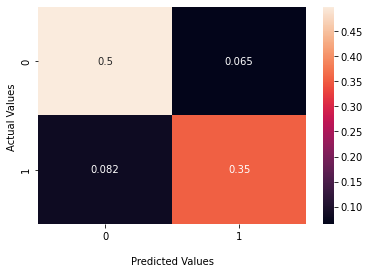

In [131]:
y_pred_test = lr.predict(X_test)

from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred_test)

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True)

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


plt.show()

In [133]:
# 6. Обучить логистическую регрессию или линейную регрессию из sklearn, оценить качество модели на обучающей и тестовой выборках и сравнить со своей моделью

In [96]:
from sklearn.linear_model import LogisticRegression

In [113]:
sklr = LogisticRegression()
sklr.fit(X_train, y_train)

LogisticRegression()

In [114]:
print(sklr.score(X_train, y_train))
print(sklr.score(X_test, y_test))

0.8743744156629819
0.8775824457846786


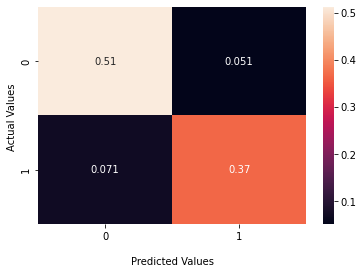

In [120]:
y_pred_test_ = sklr.predict(X_test)

cf_matrix_ = confusion_matrix(y_test, y_pred_test_)

ax = sns.heatmap(cf_matrix_/np.sum(cf_matrix_), annot=True)

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


plt.show()

Библиотечная реализация показала себя лучше чем собственная, однако различия в скорах небольшие, что дает возможность дооптимизировать свою реализацию до лучшего результата.